*ref: https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_in_sklearn.html*

Hopefully, this problem of finding the best parameters values (i.e. that result in the lowest error) can be solved without the need to check every potential parameter combination. 

Indeed, this problem has a closed-form solution: **the best parameter values can be found by solving an equation**. 

This avoids the need for brute-force search. This strategy is implemented in scikit-learn.

In [3]:
import pandas as pd

penguins = pd.read_csv("../../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [6]:
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

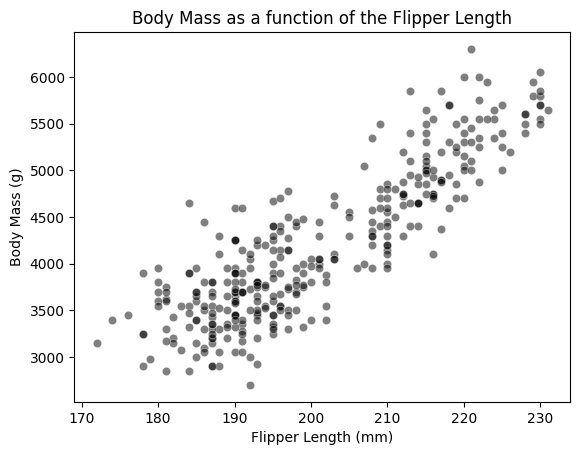

In [7]:
import seaborn as sns

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.set_title("Body Mass as a function of the Flipper Length")

In [9]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [12]:
# The instance linear_regression will store the parameter values in the attributes coef_ and intercept_. 
# We can check what the optimal model found is:

weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610009

In [14]:
intercept_body_mass = linear_regression.intercept_
intercept_body_massintercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077063

In [16]:
# We will use the weight and intercept to plot the model found using the scikit-learn.

import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

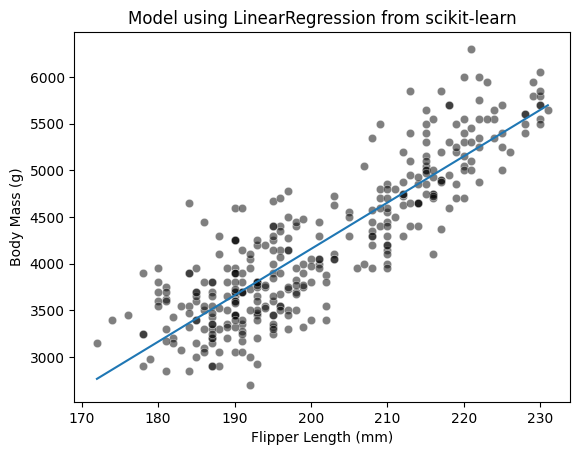

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [20]:
# We can first compute the mean squared error.

from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


In [21]:
# However, the mean squared error is difficult to interpret. 
# The mean absolute error is more intuitive since it provides an error in the same unit as the one of the target.

from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g
